# 1. Mounting virtual drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# 2. Installing libraries

In [6]:
!pip install handcalcs

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import handcalcs.render

In [21]:
df = pd.read_csv('/content/drive/My Drive/world_happiness_dataset.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [23]:
#df.describe()

# 5. Exploratory data analysis

In [24]:
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [25]:
df.rename(columns={"Country or region":"Country"},inplace=True)
df.head() 

,Overall rank,Country,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


## 5.1 Univariate analysis

#### *5.1.1 Score*

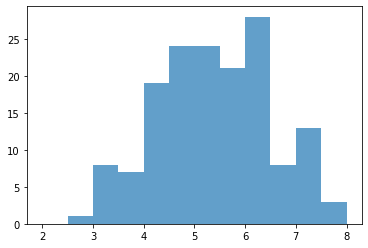

In [26]:
plt.hist(df['Score'],range=(2,8),bins=(12),alpha=0.7)
plt.show()

#### *5.1.2 GDP per capita*

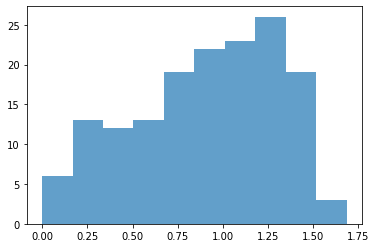

In [27]:
plt.hist(df['GDP per capita'],alpha=0.7)
plt.show()

#### *5.1.3 Healthy life expectancy*

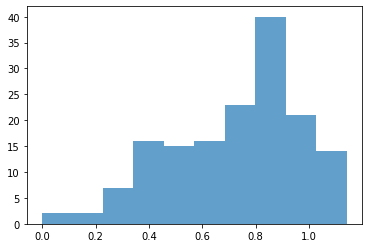

In [28]:
plt.hist(df['Healthy life expectancy'],alpha=0.7)
plt.show()

#### *5.1.4 Freedom to make life choices*

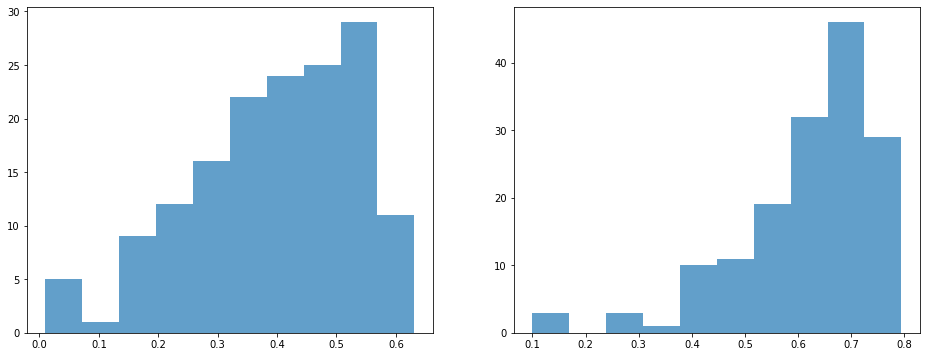

In [80]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(df['Freedom to make life choices'],alpha=0.7)
df = df[df['Freedom to make life choices']!=0]
plt.subplot(1,2,2)
plt.hist(np.sqrt(df['Freedom to make life choices']),alpha=0.7)
plt.show()

#### *5.1.5 Generosity*

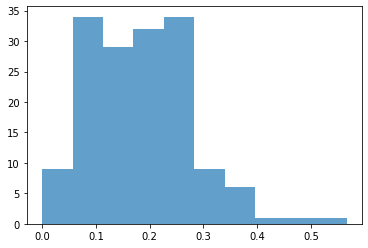

In [30]:
plt.hist(df['Generosity'],alpha=0.7)
plt.show()

#### *5.1.6 Perceptions of corruption*

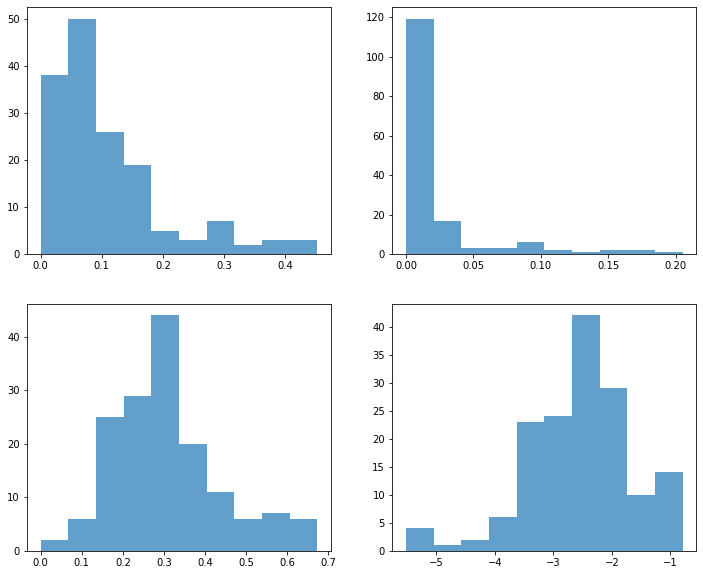

In [31]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.hist(df['Perceptions of corruption'],alpha=0.7)
plt.subplot(2,2,2)
plt.hist(np.square(df['Perceptions of corruption'].dropna()),alpha=0.7)
plt.subplot(2,2,3)
plt.hist(np.sqrt(df['Perceptions of corruption']),alpha=0.7)
plt.subplot(2,2,4)
df = df[df['Perceptions of corruption']!=0]
plt.hist(np.log(df['Perceptions of corruption']),alpha=0.7)

plt.show()

## 5.2 Bivariate analysis

Text(0.5, 1.05, 'Correlation Matrix')

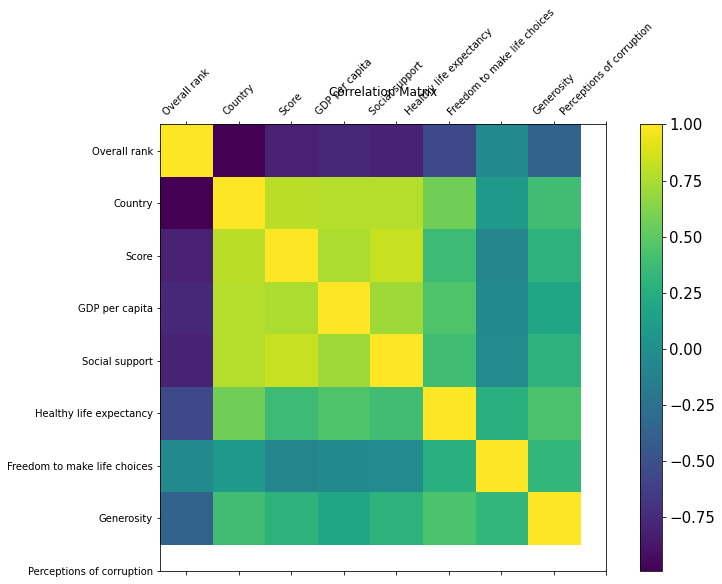

In [32]:
f = plt.figure(figsize=(12, 8))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df.shape[1]), df.columns, fontsize=10, rotation=45)
plt.yticks(range(df.shape[1]), df.columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=15)
plt.title('Correlation Matrix', fontsize=12)

In [39]:
df.corr().style.background_gradient()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989105,-0.803411,-0.767500,-0.787428,-0.549662,-0.048041,-0.354832
Score,-0.989105,1.000000,0.795095,0.777205,0.779881,0.569461,0.075856,0.388189
GDP per capita,-0.803411,0.795095,1.000000,0.757476,0.836504,0.377057,-0.079887,0.296334
Social support,-0.767500,0.777205,0.757476,1.000000,0.719241,0.451788,-0.048047,0.185849
Healthy life expectancy,-0.787428,0.779881,0.836504,0.719241,1.000000,0.392131,-0.029496,0.297040
Freedom to make life choices,-0.549662,0.569461,0.377057,0.451788,0.392131,1.000000,0.270406,0.434447
Generosity,-0.048041,0.075856,-0.079887,-0.048047,-0.029496,0.270406,1.000000,0.327692
Perceptions of corruption,-0.354832,0.388189,0.296334,0.185849,0.297040,0.434447,0.327692,1.000000


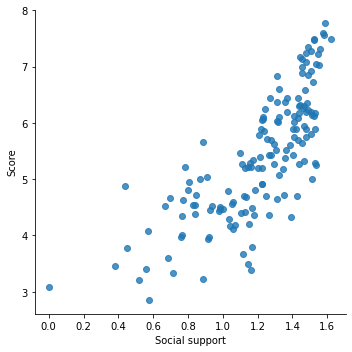

In [33]:
sns.lmplot(data=df,x='Social support',y='Score',fit_reg=False)

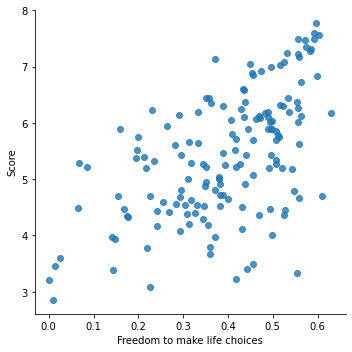

In [34]:
sns.lmplot(data=df,x='Freedom to make life choices',y='Score',fit_reg=False)

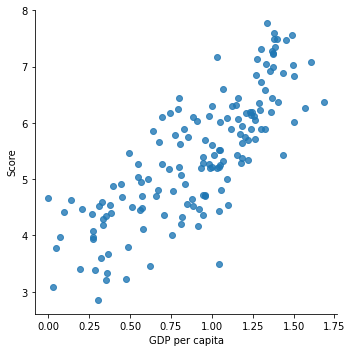

In [35]:
sns.lmplot(data=df,x='GDP per capita',y='Score',fit_reg=False)

0.38818893465166665
0.23607875963194372


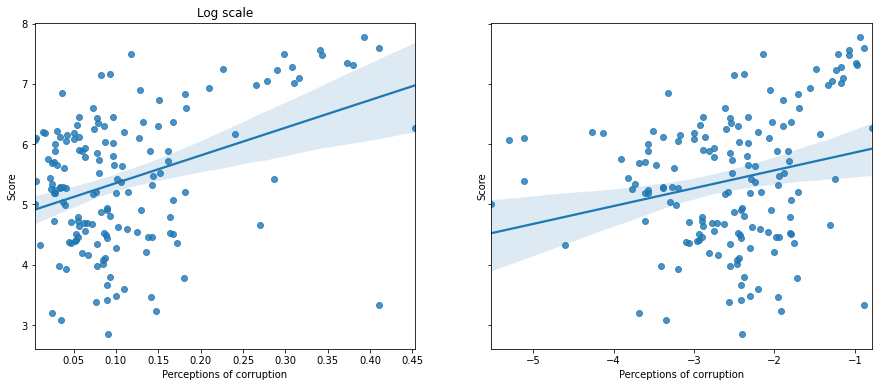

In [75]:
fig,axes = plt.subplots(1,2,sharey=True,figsize=(15,6))
sns.regplot(ax=axes[0],x=df['Perceptions of corruption'],y=df['Score'],fit_reg=True)
axes[0].set_title('Original scale')
sns.regplot(ax=axes[1],x=np.log(df['Perceptions of corruption']),y=df['Score'],fit_reg=True)
axes[0].set_title('Log scale')


print (np.corrcoef(df['Score'],df['Perceptions of corruption'])[0][1])
print (np.corrcoef(df['Score'],np.log(df['Perceptions of corruption']))[0][1])

We can see above that even after applying a log transformation to the *Perceptions of corruption* variable, the correlation with the *Score* variable is poor. 

The transformation resolved the skewness to a good extent but that doesn't necessarily solve the correlation issue. 

In [37]:
df_sort_happy = df.sort_values("Score",ascending=False)
print (df_sort_happy[['Country','Score']][:30])

                 Country  Score
0                Finland  7.769
1                Denmark  7.600
2                 Norway  7.554
3                Iceland  7.494
4            Netherlands  7.488
5            Switzerland  7.480
6                 Sweden  7.343
7            New Zealand  7.307
8                 Canada  7.278
9                Austria  7.246
10             Australia  7.228
11            Costa Rica  7.167
12                Israel  7.139
13            Luxembourg  7.090
14        United Kingdom  7.054
15               Ireland  7.021
16               Germany  6.985
17               Belgium  6.923
18         United States  6.892
19        Czech Republic  6.852
20  United Arab Emirates  6.825
21                 Malta  6.726
22                Mexico  6.595
23                France  6.592
24                Taiwan  6.446
25                 Chile  6.444
26             Guatemala  6.436
27          Saudi Arabia  6.375
28                 Qatar  6.374
29                 Spain  6.354


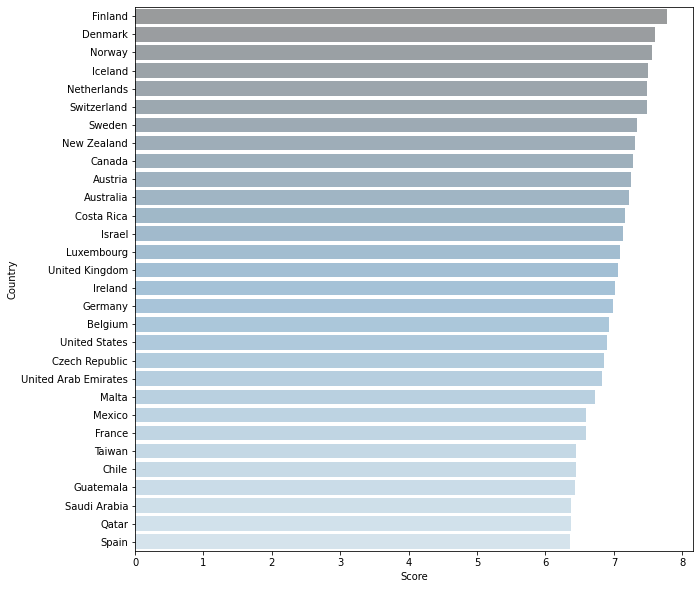

In [73]:
plt.figure(figsize=(10,10))
sns.barplot(y='Country',x='Score',data=df_sort_happy[:30],palette='Blues_d',alpha=0.5)
plt.show()

# Clustering